# 1. Preparando los datos

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../dataset/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

Pasamos todos los caracteres a minúsculas para homogeneizar el dataframe y sustituimos los espacios por '_'

In [5]:
#Pasamos a minúsculas y cambiamos espacios por '_'
replacer = lambda str: str.lower().str.replace(' ', '_')
df.columns = replacer(df.columns.str)
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
df.head().T


,0,1,2,3,4
prospect_id,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
lead_number,660737,660728,660727,660719,660681
lead_origin,api,api,landing_page_submission,landing_page_submission,landing_page_submission
lead_source,olark_chat,organic_search,direct_traffic,direct_traffic,google
do_not_email,no,no,no,no,no
do_not_call,no,no,no,no,no
converted,0,0,1,0,1
totalvisits,0.0,5.0,2.0,1.0,2.0
total_time_spent_on_website,0,674,1532,305,1428
page_views_per_visit,0.0,2.5,2.0,1.0,1.0


Comprobamos el tamaño del dataframe para saber qué columnas pueden ser interesantes eliminar por contener demasiados valores faltanes

In [6]:
df.shape

(9240, 37)

Eliminamos las columnas prospected_id y lead_number porque funcionan como identificadores y no aportan información útil para encontrar el objetivo

In [7]:
del_col = ['prospect_id', 'lead_number']
df.drop(del_col, axis=1, inplace=True)

Ahora, iteraremos el resto de columnas haciendo uso de la función value_counts para identificar posibles columnas sobrantes

In [8]:
col = list(df.columns)
for i in col:
    print(f"-----------------------------------{i}------------------------------------------")
    print(df[i].value_counts(dropna=False),"\n\n")  
    

-----------------------------------lead_origin------------------------------------------
landing_page_submission    4886
api                        3580
lead_add_form               718
lead_import                  55
quick_add_form                1
Name: lead_origin, dtype: int64 


-----------------------------------lead_source------------------------------------------
google               2873
direct_traffic       2543
olark_chat           1755
organic_search       1154
reference             534
welingak_website      142
referral_sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
social_media            2
live_chat               2
press_release           2
welearnblog_home        1
blog                    1
welearn                 1
testone                 1
pay_per_click_ads       1
youtubechannel          1
nc_edm                  1
Name: lead_source, dtype: int64 


-----------------------------------do_not_emai

Como el cuaderno de Jupiter Notebook no puede mostrarte toda la información, podemos verla completa pulsando sobre "in a text editor"

Tras analizar y observar los distintos campos, podemos llegar a las siguientes conclusiones:
* La información geográfica es irrelevante, así que podemos eliminar las columnas City y Country del dataset, ya que es una empresa que opera a nivel global y quiere afianzar clientes independientemente del lugar donde residan.
* Hay varias columnas que tienen un único valor, por lo que no aportan ningún tipo de información relevante que pueda diferenciar a unos clientes de otros, por lo que también serán eliminadas.
* Por último, hay varias columnas cuya variedad en los datos es mínima, siendo la mayoría de los datos muy similares, por lo que tampoco aportan mucha información y es muy probable que acaben aportando una gran cantidad de ruido, por lo que también serán eliminadas.


In [9]:
# Eliminando las columnas con información geográfica

col = ['city','country']
df.drop(col,axis=1,inplace=True)

In [10]:
# Eliminando las columnas que tan solo tienen un único valor

col = ["magazine","receive_more_updates_about_our_courses",
        "update_me_on_supply_chain_content","get_updates_on_dm_content",
        "i_agree_to_pay_the_amount_through_cheque"]

df.drop(col,axis=1,inplace=True)

In [11]:
# Eliminando las columnas con poca variabilidad

col = ["do_not_call","what_matters_most_to_you_in_choosing_a_course","search",
        "newspaper_article","x_education_forums","newspaper","digital_advertisement","through_recommendations"]

df.drop(col,axis=1,inplace=True)

Ahora, haremos un análisis de los valores nulos.

In [12]:
# Visualizar los valores nulos. En primer lugar, importaré las bibliotecas necesarias
import matplotlib 
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


<AxesSubplot:>

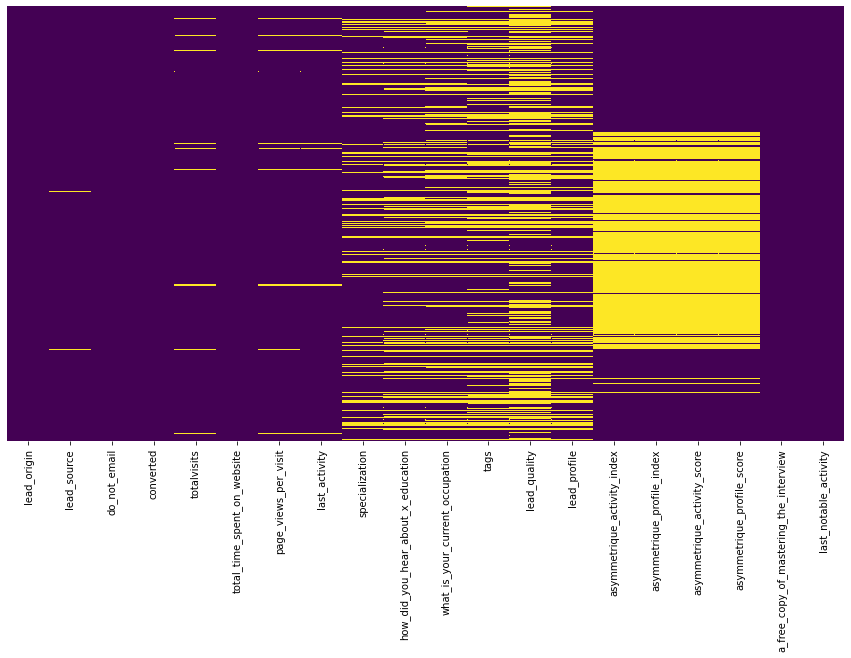

In [13]:
#A hora, visualizaremos los valores nulos.

plt.figure(figsize=[15,8])
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap='viridis')

Se ve que hay bastantes valores faltantes, así que haré un conteo de los valores nulos dentro del dataset por porcentaje

In [14]:
round((df.isnull().sum()/len(df)*100).sort_values(ascending=False),2)

lead_quality                              51.59
asymmetrique_profile_index                45.65
asymmetrique_profile_score                45.65
asymmetrique_activity_score               45.65
asymmetrique_activity_index               45.65
tags                                      36.29
lead_profile                              29.32
what_is_your_current_occupation           29.11
how_did_you_hear_about_x_education        23.89
specialization                            15.56
totalvisits                                1.48
page_views_per_visit                       1.48
last_activity                              1.11
lead_source                                0.39
a_free_copy_of_mastering_the_interview     0.00
lead_origin                                0.00
total_time_spent_on_website                0.00
converted                                  0.00
do_not_email                               0.00
last_notable_activity                      0.00
dtype: float64

Como hay muchas columnas con un alto contenido de valores nulos, vamos a eliminar aquellas columnas que tengan más de un 40% de valores nulos:

In [15]:
# Almacenamos el porcentaje de valores nulos
null_col = df.isnull().sum()/len(df)

# Seleccionalos aquellas columnas que sean >= 40% de valores nulos
null_col_list = null_col[null_col.values>=0.4].index.tolist()

# Número de columnas con un valor nulo >= 40%
len(null_col_list)

5

Sabemos que tenemos un total de 5 columnas con un valor nulo >= 40%, por lo que podremos eliminarlas.

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

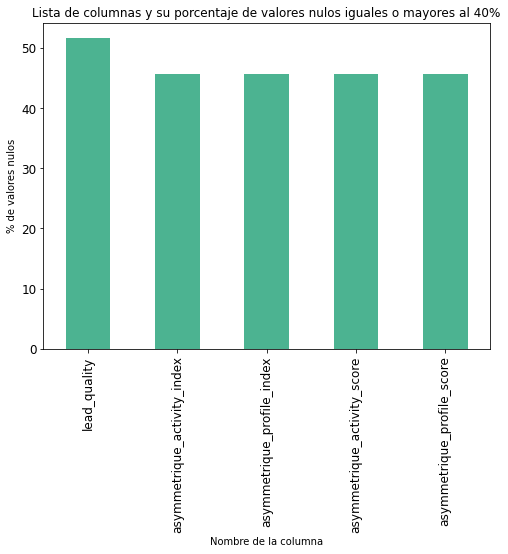

In [16]:
# Vamos a dibujar un gráfica con el porcentaje de valores nulos de cada columna

plt.figure(figsize=[8,6])
((null_col[null_col.values>0.4])*100).sort_values(ascending=False).plot.bar(color="#4CB391")
plt.title("Lista de columnas y su porcentaje de valores nulos iguales o mayores al 40%")
plt.xlabel("Nombre de la columna")
plt.ylabel("% de valores nulos")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Ahora, procedo a eliminar aquellas columnas que hemos dibujado en la gráfica anterior

In [17]:
# Borrando columnas con tasa de valores nulos >= 40%

df.drop(labels=null_col_list,axis=1,inplace=True)
df.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,tags,lead_profile,a_free_copy_of_mastering_the_interview,last_notable_activity
0,api,olark_chat,no,0,0.0,0,0.0,page_visited_on_website,select,select,unemployed,interested_in_other_courses,select,no,modified
1,api,organic_search,no,0,5.0,674,2.5,email_opened,select,select,unemployed,ringing,select,no,email_opened
2,landing_page_submission,direct_traffic,no,1,2.0,1532,2.0,email_opened,business_administration,select,student,will_revert_after_reading_the_email,potential_lead,yes,email_opened
3,landing_page_submission,direct_traffic,no,0,1.0,305,1.0,unreachable,media_and_advertising,word_of_mouth,unemployed,ringing,select,no,modified
4,landing_page_submission,google,no,1,2.0,1428,1.0,converted_to_lead,select,other,unemployed,will_revert_after_reading_the_email,select,no,modified


Hay varias columnas que tienen el valor "select" dentro de sus datos. Esto puede ser porque estos datos fueron rellenados a través de un formulario y estas casillas tuvieran un desplegable que no contenía una respuesta adecuada para este tipo de usuario. Sería interesante examinar de nuevo las culumnas y sustituir esos "select" por valores nulos.

In [18]:
col = list(df.columns)
for i in col:
    print(f"-----------------------------------{i}------------------------------------------")
    print(df[i].value_counts(dropna=False),"\n\n")  
    

-----------------------------------lead_origin------------------------------------------
landing_page_submission    4886
api                        3580
lead_add_form               718
lead_import                  55
quick_add_form                1
Name: lead_origin, dtype: int64 


-----------------------------------lead_source------------------------------------------
google               2873
direct_traffic       2543
olark_chat           1755
organic_search       1154
reference             534
welingak_website      142
referral_sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
social_media            2
live_chat               2
press_release           2
welearnblog_home        1
blog                    1
welearn                 1
testone                 1
pay_per_click_ads       1
youtubechannel          1
nc_edm                  1
Name: lead_source, dtype: int64 


-----------------------------------do_not_emai

Podemos ver que las columas "specialization", "how_did_you_hear_about_x_education" y "lead_profile" contienen una gran cantidad de este valor. Examinemos cada caso para ver si nos interesa mantenerlas o eliminarlas.

In [19]:

df["specialization"].value_counts(normalize=True)

select                               0.248911
finance_management                   0.125096
human_resource_management            0.108690
marketing_management                 0.107408
operations_management                0.064471
business_administration              0.051653
it_projects_management               0.046911
supply_chain_management              0.044732
banking,_investment_and_insurance    0.043322
media_and_advertising                0.026019
travel_and_tourism                   0.026019
international_business               0.022815
healthcare_management                0.020379
hospitality_management               0.014612
e-commerce                           0.014355
retail_management                    0.012817
rural_and_agribusiness               0.009357
e-business                           0.007306
services_excellence                  0.005127
Name: specialization, dtype: float64

"specialization" contiene un total de 24.89% y no contiene ningún valor nulo, por lo que la mantenemos

In [20]:
df["how_did_you_hear_about_x_education"].value_counts(normalize=True)

select                   0.717048
online_search            0.114887
word_of_mouth            0.049481
student_of_someschool    0.044078
other                    0.026447
multiple_sources         0.021612
advertisements           0.009953
social_media             0.009527
email                    0.003697
sms                      0.003270
Name: how_did_you_hear_about_x_education, dtype: float64

"how_did_you_hear_about_x_education" contiene un 71.7% de valores nulos, por lo que la borramos

In [21]:
df["lead_profile"].value_counts(normalize=True)

select                         0.634819
potential_lead                 0.246976
other_leads                    0.074567
student_of_someschool          0.036901
lateral_student                0.003675
dual_specialization_student    0.003062
Name: lead_profile, dtype: float64

"lead_profile" contiene un 63.48%, por lo que también la eliminaremos

In [22]:
# Elimino las dos columnas del dataset
df.drop(["how_did_you_hear_about_x_education","lead_profile"],axis=1,inplace=True)

Reemplazamos todos los select por na

In [23]:
df = df.replace('select', np.nan)

Ahora vamos a convertir las columnas con 'yes' y 'no' en columnas binarias con 1 y 0

In [24]:
df.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,specialization,what_is_your_current_occupation,tags,a_free_copy_of_mastering_the_interview,last_notable_activity
0,api,olark_chat,no,0,0.0,0,0.0,page_visited_on_website,NaN,unemployed,interested_in_other_courses,no,modified
1,api,organic_search,no,0,5.0,674,2.5,email_opened,NaN,unemployed,ringing,no,email_opened
2,landing_page_submission,direct_traffic,no,1,2.0,1532,2.0,email_opened,business_administration,student,will_revert_after_reading_the_email,yes,email_opened
3,landing_page_submission,direct_traffic,no,0,1.0,305,1.0,unreachable,media_and_advertising,unemployed,ringing,no,modified
4,landing_page_submission,google,no,1,2.0,1428,1.0,converted_to_lead,NaN,unemployed,will_revert_after_reading_the_email,no,modified


In [25]:
df['do_not_email']=df.do_not_email.eq('yes').mul(1)
df['a_free_copy_of_mastering_the_interview']=df.a_free_copy_of_mastering_the_interview.eq('yes').mul(1)

A continuación, para poder seguir con el modelo, tenemos que hacer algo con los valores nulos. En este caso, he decidido reemplazarlos todos por 0, y en las columnas que no son numéricas, reemplazar estos "0" por el valor "null"

In [26]:
df = df.fillna(0)
df['lead_source'] = df['lead_source'].replace(0, 'null')
df['total_time_spent_on_website'] = df['total_time_spent_on_website'].replace('null', 0)
df['last_activity'] = df['last_activity'].replace(0, 'null')
df['specialization'] = df['specialization'].replace(0, 'null')
df['what_is_your_current_occupation'] = df['what_is_your_current_occupation'].replace(0, 'null')
df['tags'] = df['tags'].replace(0, 'null')

Ahora, separaremos la columna objetivo del resto de datos. Para ello, la columna objetivo la almacenamos en la variable "target" y el  resto del conjunto en la variable "data"

In [27]:
target_name = "converted"
target = df[target_name]
target

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: converted, Length: 9240, dtype: int64

In [28]:
data = df.drop(columns=[target_name])
data.head()

,lead_origin,lead_source,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,specialization,what_is_your_current_occupation,tags,a_free_copy_of_mastering_the_interview,last_notable_activity
0,api,olark_chat,0,0.0,0,0.0,page_visited_on_website,null,unemployed,interested_in_other_courses,0,modified
1,api,organic_search,0,5.0,674,2.5,email_opened,null,unemployed,ringing,0,email_opened
2,landing_page_submission,direct_traffic,0,2.0,1532,2.0,email_opened,business_administration,student,will_revert_after_reading_the_email,1,email_opened
3,landing_page_submission,direct_traffic,0,1.0,305,1.0,unreachable,media_and_advertising,unemployed,ringing,0,modified
4,landing_page_submission,google,0,2.0,1428,1.0,converted_to_lead,null,unemployed,will_revert_after_reading_the_email,0,modified


Ahora lo dividiré entre conjunto de entrenamiento y conjunto de test

In [29]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

Creamos el pipeline predictivo. Utilizaré un selector para seleccionar las columnas categóricas y le haré un "OrdinalEncoder"

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                            unknown_value=-1)
preprocessor = ColumnTransformer([
    ('cat_preprocessor', categorical_preprocessor, categorical_columns)],
    remainder='passthrough', sparse_threshold=0)



A continuación, crearé el modelo pasándole un pipeline con el preprocesador (creado en el apartado anterior) y el clasificador (para este caso, el HistGradientBoostingClassifier) y le asignaré el nombre "preprocessor" y "classifier" respectivamente.

In [31]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4)),
])

A continuación, ajustaré el modelo al conjunto de datos. Al ejecutarlo, podemos ver la estructura del modelo, las variables categóricas y el clasificador.

In [32]:
model.fit(data_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['lead_origin', 'lead_source',
                                                   'last_activity',
                                                   'specialization',
                                                   'what_is_your_current_occupation',
                                                   'tags',
                                                   'last_notable_activity'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

Por último, comprobamos la eficacia del modelo. Para ello, haremos una validación cruzada pasándole el modelo, los datos de test y el objetivo de test (conjuntos que el modelo no ha visto). Almacenaremos el contenido de la columna "test_result" en la variable "score" y mostraremos la puntuación de precisión en un print.

In [33]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data_test, target_test)
scores = cv_results["test_score"]
print(f"Pntuación de precisión via cross-validation:\n"
    f"{scores.mean():.3f} +/- {scores.std():.3f}")

Pntuación de precisión via cross-validation:
0.923 +/- 0.012


La puntuación está por encima de lo exigido en el ejercicio, por lo que podemos llegar a la conclusión de que este modelo cumple con lo solicitado por el ejercicio. Ya solo queda sacar el modelo para poder desplegarlo en una aplicación web.

# 2. Serialización del modelo

Importamos pickle para poder volcar nuestro modelo en disco.

In [34]:
import pickle

In [35]:
with open("../models/practica_model.pck", "wb") as f:
    pickle.dump((model), f)

Antes de poner el servidor a funcionar, voy a comprobar que responde correctamente a un array con un json dentro

In [39]:

diccionario = [{
   "lead_origin":"api",
   "lead_source":"olark_chat",
   "do_not_email":0,
   "totalvisits":0.0,
   "total_time_spent_on_website":0,
   "page_views_per_visit":0.0,
   "last_activity":"page_visited_on_website",
   "specialization":"not_specified",
   "what_is_your_current_occupation":"unemployed",
   "tags":"interested_in_other_courses",
   "a_free_copy_of_mastering_the_interview":0,
   "last_notable_activity":"modified"
}]

diccionario = pd.DataFrame(diccionario)
model.predict(diccionario)

array([0], dtype=int64)

Una vez hecha esta comprobación, ya podemos poceder al despliegue.